## Manuell

In [12]:
import numpy as np

- Natürliche Zahlen
- Ganze Zahlen
- Rationale Zahlen
- Rationale Zahlen und Irrationale Zahlen - > R
- Complexe Zahlen (Quantum Comp und Frequenz-Analyse) -> C schliesst R ein

In [13]:
X = np.random.randint(1, 40, 10)
X = np.array(X).astype(np.float32)

In [14]:
X

array([14., 30.,  1.,  5., 36., 29., 28.,  1., 36., 33.], dtype=float32)

In [15]:
# X = np.arange(1,20).astype(np.float32)
X.sort()
X

array([ 1.,  1.,  5., 14., 28., 29., 30., 33., 36., 36.], dtype=float32)

In [16]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [17]:
# List comprehension
m = 5
b = 10
Y = [m*x + b for x in X]
print(Y)

[np.float32(15.0), np.float32(15.0), np.float32(35.0), np.float32(80.0), np.float32(150.0), np.float32(155.0), np.float32(160.0), np.float32(175.0), np.float32(190.0), np.float32(190.0)]


Wir erstellen hier eine Liste.
[   ]

2*x + 6 für jedes Element x in X

In [18]:
len(X)

10

(m_deriv
b_deriv)
m_deriv ist die partielle Ableitung nach m (Gewicht)
b_deriv ist --- nach b (Bias)

$MSE = 1/N\sum_{i=0} ^N (Y_i - (mX_i + b))^2$





In [19]:
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # (z.b. y = 3x +5z + 10)

        # Calculate partial derivatives
        # -x (innere Ableitung) * 2(y - (mx + b)) (äussere Ableitung)
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))


    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    history_m.append(m)
    history_b.append(b)

    return m,b


In [20]:
def train(epochs, learning_rate:int)-> tuple[float, float]:
    m=0
    b=0
    for epoch in range(epochs):
        # abbruchskriterium - "early stopping"
        m,b = update_weights(m, b, X, Y, learning_rate)
        if epoch%200==0:
          print(f"Epoch: {epoch}, m: {m}, b: {b}")
    return m,b

In [21]:
epochs = 1000000
history_m = []
history_b = []

In [23]:
train(epochs, learning_rate=1e-4)

Epoch: 0, m: 0.6854999661445618, b: 0.02329999953508377
Epoch: 200, m: 5.3217854499816895, b: 0.291939914226532
Epoch: 400, m: 5.3180251121521, b: 0.40543514490127563
Epoch: 600, m: 5.314305305480957, b: 0.5176031589508057
Epoch: 800, m: 5.310632228851318, b: 0.6284602284431458
Epoch: 1000, m: 5.306999206542969, b: 0.7380207777023315
Epoch: 1200, m: 5.303411483764648, b: 0.8463013172149658
Epoch: 1400, m: 5.299865245819092, b: 0.953315019607544
Epoch: 1600, m: 5.296358585357666, b: 1.0590784549713135
Epoch: 1800, m: 5.2928948402404785, b: 1.1636050939559937
Epoch: 2000, m: 5.289468765258789, b: 1.2669097185134888
Epoch: 2200, m: 5.286086082458496, b: 1.3690071105957031
Epoch: 2400, m: 5.282740116119385, b: 1.4699091911315918
Epoch: 2600, m: 5.279435157775879, b: 1.5696334838867188
Epoch: 2800, m: 5.276169776916504, b: 1.6681913137435913
Epoch: 3000, m: 5.272939682006836, b: 1.7655973434448242
Epoch: 3200, m: 5.269749641418457, b: 1.861864447593689
Epoch: 3400, m: 5.266594886779785, b: 

(np.float32(5.000274), np.float32(9.9917755))

In [24]:
history_m[500]

np.float32(5.316161)

In [75]:
history_b[1999]

np.float32(1.2204219)

In [26]:
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
%matplotlib inline

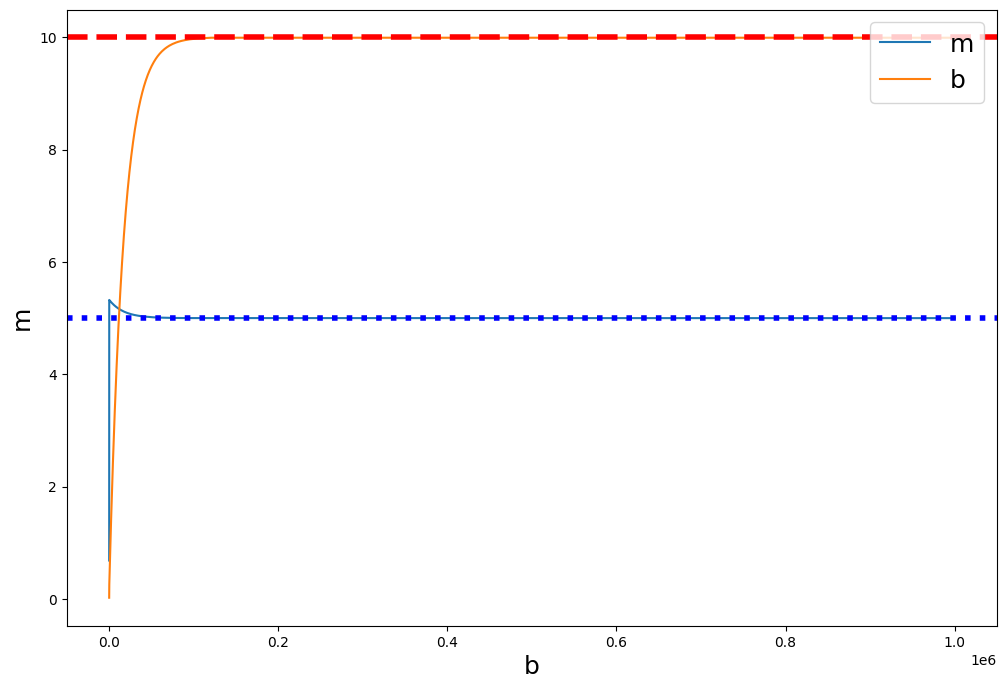

In [27]:

plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.axhline(y=b, xmin=0, xmax=epochs, c='r', linewidth=4,linestyle='--')
plt.axhline(y=m, xmin=0, xmax=epochs, c='b', linewidth=4, linestyle=':')
plt.ylabel('m',fontsize= 18)
plt.xlabel('b',fontsize= 18)
plt.legend(['m', 'b'], loc='upper right', fontsize= 18);

In [28]:
import torch
from torch import nn

In [29]:
X, Y

(array([ 1.,  1.,  5., 14., 28., 29., 30., 33., 36., 36.], dtype=float32),
 [np.float32(15.0),
  np.float32(15.0),
  np.float32(35.0),
  np.float32(80.0),
  np.float32(150.0),
  np.float32(155.0),
  np.float32(160.0),
  np.float32(175.0),
  np.float32(190.0),
  np.float32(190.0)])

## Mit PyTorch

### Aufgabe 1:
1. Eigene function definieren mit ZWEI vars
2. Andere X und Y werte
3. LR varieren und das training beobachten (zu hohe, zu niedrige LR)
  - Macht ein LR range [from, to] - z.B. for loop
  - nimmt das beste LR (minimaler Loss, keine NaNs)
  - "Grid Search"
4. Plot die wahre und die predictete Funtionen gegeneinander

In [30]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(1, 10, 10, dtype=dtype)
y = 2*x + 6

# Create random Tensors for weights.
# 2 weights: a and b
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-3
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a*x + b

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad


        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None


print(f'Result: y = {a.item()} + {b.item()} x')

0 2164.193115234375
100 35.06568908691406
200 15.1128568649292
300 6.513448238372803
400 2.807218551635742
500 1.2098804712295532
600 0.5214414596557617
700 0.2247350811958313
800 0.09685806930065155
900 0.041745223104953766
1000 0.01799117587506771
1100 0.007754241116344929
1200 0.003341963980346918
1300 0.0014404840767383575
1400 0.0006208043778315187
1500 0.00026758102467283607
1600 0.00011535182420630008
1700 4.971344969817437e-05
1800 2.142065204679966e-05
1900 9.238179700332694e-06
Result: y = 2.0001959800720215 + 5.998636722564697 x


## Mit PyTorch und für komplexe nicht-lineare Funktion


### Aufgabe 2
1. Define own non-linear function
2. 5 weights y = a + b x + c x^2 + d x^3 +c x^4
3. In case grade 4 is not enough, try grade 5
4. Plot the results in each case real function vs approximation

In [31]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)


# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 347.82073974609375
199 241.25393676757812
299 168.36900329589844
399 118.46269989013672
499 84.25130462646484
599 60.77212142944336
699 44.64012145996094
799 33.54378890991211
899 25.902719497680664
999 20.635108947753906
1099 16.999855041503906
1199 14.488407135009766
1299 12.751603126525879
1399 11.549267768859863
1499 10.716065406799316
1599 10.138127326965332
1699 9.736878395080566
1799 9.458030700683594
1899 9.26408576965332
1999 9.129071235656738
Result: y = 0.01672953926026821 + 0.8490803241729736 x + -0.002886122325435281 x^2 + -0.09224074333906174 x^3


## Mit PyTorch und nn module

### Aufgabe 3 (wenn 1 und 2 fertig sind) - optional
1. Wie Augabe 2 nur mit nn lösen (d.h. zu approximierende Funktion, gleiche Werte, gleicher Polynom) - nur alles mit nn alalog dem Bespiel unten

2. Loss während dem Training plotten

In [32]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [ ]:
x.shape

torch.Size([2000])

In [33]:
# p = torch.tensor([1, 2, 3])
x.unsqueeze(-1).shape

torch.Size([2000, 1])

In [34]:
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [ ]:
fc = torch.nn.Linear(3, 1)
fc(xx).shape

torch.Size([2000, 1])

In [ ]:
flat = torch.nn.Flatten(0,1)

In [ ]:
out = fc(xx)
out.shape

torch.Size([2000, 1])

In [ ]:
flat(out).shape

torch.Size([2000])

In [ ]:

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1),

)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 836.1294555664062
199 560.0737915039062
299 376.3053283691406
399 253.92047119140625
499 172.37890625
599 118.02490234375
699 81.77565002441406
799 57.58780288696289
899 41.43978500366211
999 30.6528377532959
1099 23.44274139404297
1199 18.620513916015625
1299 15.393159866333008
1399 13.231743812561035
1499 11.78315544128418
1599 10.811569213867188
1699 10.159427642822266
1799 9.721343040466309
1899 9.426800727844238
1999 9.228596687316895
Result: y = 0.011916369199752808 + 0.8403390645980835 x + -0.002055770717561245 x^2 + -0.0909973755478859 x^3


## ...mit einem Optimizer

### Aufgabe 4 (wenn 1, 2 und fertig sind) - optional
1. Wie Augabe 3 nur mit nn **und Optimizer** lösen
2. Loss während dem Training plotten und mit dem Plot von Aufgabe 3 vergleichen
3. BONUS: Adam, RMSprop, SGD

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 8946.1953125
199 2386.03759765625
299 518.4965209960938
399 204.34925842285156
499 172.95484924316406
599 151.12196350097656
699 122.7550277709961
799 90.3787841796875
899 59.3159065246582
999 34.75654983520508
1099 19.07472801208496
1199 11.50229263305664
1299 9.16215991973877
1399 8.832923889160156
1499 8.827082633972168
1599 8.831417083740234
1699 12.119975090026855
1799 8.930072784423828
1899 8.964946746826172
1999 8.898226737976074
Result: y = 8.196273659777376e-10 + 0.8562785387039185 x + 1.3314771507566547e-09 x^2 + -0.0937945544719696 x^3
